#### deskriptive Statistik interaktiv

Unterschiedlichen Verteilungsfunktionen können interaktiv parametriert und in einem Diagramm dargestellt werden. Zu der dargestellten Funktion können zudem weitere Kennwerte dargestellt werden.

**Auswählbare Funktionen:**
- Normalverteilung (Gauß-Funktion)
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm    

- Gamma-Poisson-Verteilung (negative Binomialverteilung)
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.nbinom.html#scipy.stats.nbinom

- Poisson-Verteilung https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

- Weibull-Verteilung https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.weibull_min.html


In [1]:
# resourcen
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, norm, nbinom, weibull_min, mode

#set backend for interactive toolbar
%matplotlib nbagg

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
#interaktive Schalter
# Signalauswahl
distribFuns = ['Poissonverteilung', 'Gamma-Poisson-Verteilung','Normalverteilung','Weibull-Verteilung']
distrib_select = widgets.Dropdown(description='', options=distribFuns, value='Normalverteilung',layout= widgets.Layout(width='75%',height='auto'))

layout= widgets.Layout(width='80%',height='auto')
style = {'description_width': 'initial'}
# Funktionsparameter
#
# Anzahl der Zufallswerte
size = widgets.BoundedIntText(value=1000, min=20, max=100000,\
                              description='Datensatzgröße:',layout= layout)
# ------------------------------------------------------------------------------------------------------------------------------
#
# Gauss: µ: Erwartungswert, \sigma: Standardabweichung 
mu = widgets.FloatSlider(min=-150, max=150, value=0, description="µ:",\
                         tooltips="Gauss: Erwartungswert. Poisson: Erwartungswert und Varianz",\
                        continuous_update=False, layout= widgets.Layout(width='75%',height='auto'))
sigma = widgets.FloatSlider(min=0.1, max=5, value=1, description='$\sigma$:', tooltips="Standardabweichung",\
                            layout= layout)
# ------------------------------------------------------------------------------------------------------------------------------
#
# Weibull : - Skalen- und Formparameter
lambda_wbl = widgets.FloatSlider(min=0.1, max=100, value=1, step=0.1, description='$\lambda$:', tooltips="Skalenparameter $\lambda$.%1 \over \lambda > 0$.",\
                                layout= layout,continuous_update=False)
form_wbl = widgets.FloatSlider(min=0, max=150, value=1, description="k:", tooltips="Formparamter k. k > 0",\
                               continuous_update=False, layout= layout)
# ------------------------------------------------------------------------------------------------------------------------------
#
# Gamma-Poisson => negative Binomialverteilung: n: Anzahl Erfolge, p: Einzelwahrscheinlichkeit 
n = widgets.IntSlider(min=0, max=500, value = 10, description='n: (mean²/(var - mean))', tooltips="Anzahl der Erfolge n. n > 0",\
                      continuous_update=False, layout= layout)
p = widgets.FloatSlider(min=0, max=1, value = 0.5, description='p: (mean/varianz)', tooltips="Wahrscheinlichkeit eines einzelnen Erfolgs. $0 \leq p \leq 1$",\
                       continuous_update=False, layout= layout)
# ------------------------------------------------------------------------------------------------------------------------------
#
# Poisson: Erwartungswert und Varianz µ (geteilt mit Gauss - Erwartungswert)
#
# Quantil - Auswahl
quantile = widgets.FloatSlider(min= 0, max=100, value=50, description="Quantil-Auswahl /%",layout= widgets.Layout(width='50%',height='auto'))
# ------------------------------------------------------------------------------------------------------------------------------
#
# Visualisierungsoptionen
toggle_1 = widgets.ToggleButtons(options=['pdf/pmf', 'cdf'],\
                                 description='',\
                                 disabled=False,
                                 button_style='', # 'success', 'info', 'warning', 'danger' or ''
                                 tooltips=['zeige Dichte- bzw. Wahrscheinlichkkeitsfunktion', 'zeige Verteilungsfunktion'],
                                )
# ------------------------------------------------------------------------------------------------------------------------------
toggle_2 = widgets.ToggleButtons(options=['line','boxplot', 'violinplot'],
                                 description='',
                                 disabled=False,
                                 button_style='', # 'success', 'info', 'warning', 'danger' or ''
                                 tooltips=['line-plot','Boxer-und-Whisker Ansicht', 'Violin Ansicht'],
                                )
# ------------------------------------------------------------------------------------------------------------------------------
#
# plot limits
x_range = widgets.IntRangeSlider(min= -200, max=200, value=[-5,5],description='$x_{range}$', layout= widgets.Layout(width='50%',height='auto'))
#
BtnReset = widgets.Button(description="reset", button_style='warning')
# ------------------------------------------------------------------------------------------------------------------------------

In [4]:
def draw_rvs(dict_distribution, ax):
# Datensatz der Verteilungsfunktion darstellen
    x = dict_distribution['x']
    y = dict_distribution['rvs']    
    ax.clear()
    ax.set_title("{}".format(distrib_select.value))
#     ax.hist(y, normed=True, histtype='stepfilled', alpha=0.2)
    ax.hist(y)
    ax.set_xlim(x_range.value[0], x_range.value[-1])

#     ax.set_xlabel("x")
    ax.set_ylabel("Wahrscheinlichkeit")
    ax.yaxis.grid(True, linestyle='-', which='major',\
                  color='lightgrey',alpha=0.5)

In [5]:
def draw_params(dict_distribution, ax):
    x = dict_distribution['x']
    distrib_f = dict_distribution['distrib_f']    
    var = dict_distribution['var']
    std = dict_distribution['std']
    rms = dict_distribution['rms']
    
    if toggle_1.value == 'pdf/pmf':
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['prob_f']
        mean = dict_distribution['mean_prob']
        median = dict_distribution['median_prob']
        mode = dict_distribution['mode_prob']
    else:
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['cdf']
        mean = dict_distribution['mean_cdf']
        median = dict_distribution['median_cdf']
        mode = dict_distribution['mode_cdf']

    # mean: vertikale Linie, gestrichelt, grau, Kommentar oben mit Pfeil, Text: µ (wert)
    # varianz: standardabweichung: - horzontale linie für gültigen Bereich
    # rms
    # modus: gauß: 0
    # median: gauß: mean
    ax.clear()
    ax.set_title("Parameter zur {}".format(distrib_select.value))
    #Verteilung nochmal zeichnen und dann die entsprechenden Informationen eintragen
    if distrib_select.value in ['Poissonverteilung', 'Gamma-Poisson-Verteilung']:
        if toggle_1.value == 'pdf/pmf':
#             ax.bar(x,y, color='green', lw=0.1)
            ax.bar(x,y, color='green', width=0.1)

#     if distrib_select.value in ['Normalverteilung', 'Weibull-Verteilung']:
    ax.plot(x, y, color='C1', lw=2)
    
    # vertikale Line bis zum Funktionswert zeichnen
    # angaben für axhline bzw. axvline in %!
    yLim = ax.get_ylim()
    yH = mean[-1]/yLim[-1] 
    #
    #Mittelwert
    ax.axvline(x=mean[0], ymin=0, ymax=yH, ls='--',color='grey',alpha=0.5)
    ax.annotate(r'$\bar{{x}}_{{{%.3f}}}$' % (mean[0]),
                 xy=(mean[0], mean[-1]), xycoords='data',
                 xytext=(-50,30), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    #
    # mode
    yH = mode[-1]/yLim[-1]    
    #
    ax.axvline(x=mode[0], ymin=0, ymax=yH) 
    ax.annotate("mode",
                 xy=(mode[0], mode[-1]), xycoords='data',
                 xytext=(-50,30), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    #
    # median
    yH = median[-1]/yLim[-1]
    #
    ax.axvline(x=median[0], ymin=0, ymax=yH)
    ax.annotate("median",
                 xy=(median[0], median[-1]), xycoords='data',
                 xytext=(50,30), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    #
    # Normalverteilung:
    # 1-sigma, 2-sigma und 3-sigma kennzeichnen
    if (distrib_select.value == 'Normalverteilung' and toggle_1.value == 'pdf/pmf'):
        #     
        m_1_sigma = distrib_f.ppf(1-0.6827)
        p_1_sigma = distrib_f.ppf(0.6827)
        m_2_sigma = distrib_f.ppf(1-0.9545)
        p_2_sigma = distrib_f.ppf(0.9545)
        m_3_sigma = distrib_f.ppf(1-0.9973)
        p_3_sigma = distrib_f.ppf(0.9973)
        #
        yH_s1n = distrib_f.pdf( m_1_sigma)
        yH_s1p = distrib_f.pdf( p_1_sigma)
        yH_s2n = distrib_f.pdf( m_2_sigma)
        yH_s2p = distrib_f.pdf( p_2_sigma)
        yH_s3n = distrib_f.pdf( m_3_sigma)
        yH_s3p = distrib_f.pdf( p_3_sigma)
        #
        ax.axvline(x=m_1_sigma, ymin=0, ymax=yH_s1n/yLim[-1])
        ax.axvline(x=p_1_sigma, ymin=0, ymax=yH_s1p/yLim[-1])
        ax.axvline(x=m_2_sigma, ymin=0, ymax=yH_s2n/yLim[-1])
        ax.axvline(x=p_2_sigma, ymin=0, ymax=yH_s2p/yLim[-1])
        ax.axvline(x=m_3_sigma, ymin=0, ymax=yH_s3n/yLim[-1])
        ax.axvline(x=p_3_sigma, ymin=0, ymax=yH_s3p/yLim[-1])
        
        # bereich markieren +/- sigma
        # - hintergrund mit Farbe füllen
        ax.fill_between(x, 0, y, where =(y >= (yH_s3n)),\
                   facecolor='blue', alpha=0.3)
        ax.fill_between(x,0,y, where =(y >= (yH_s2n)),\
                   facecolor='blue', alpha=0.2)
        ax.fill_between(x,0,y, where =(y >= (yH_s1n)),\
                   facecolor='blue', alpha=0.1)
        #
        # horizontale Linien an den Stellen +/- sigma ziehen und beschriften
        ax.plot((m_1_sigma,p_1_sigma),(yH_s1n, yH_s1n), ls='-', color='green')
        ax.annotate(r'$\pm\sigma$', xy=(mu.value, yH_s1n), xycoords='data')
        #
        ax.plot((m_2_sigma,p_2_sigma), (yH_s2n, yH_s2n),ls='-', color='green')
        ax.annotate(r'$\pm2\sigma$', xy=(mu.value, yH_s2n), xycoords='data')
        #
        ax.plot((m_3_sigma,p_3_sigma), (yH_s3n, yH_s3n),ls='-', color='green')
        ax.annotate(r'$\pm3\sigma$', xy=(mu.value, yH_s3n), xycoords='data')
   
    # Abszissenbereich entsprechend Bereichsauswahl einstellen
    ax.set_xlim(x_range.value[0], x_range.value[-1])
    #
    # Gitterlinien andeuten
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)


In [6]:
def draw_custom(dict_distribution, ax):
    
    x = dict_distribution['x']
    distrib_f = dict_distribution['distrib_f']    
    var = dict_distribution['var']
    std = dict_distribution['std']
    rms = dict_distribution['rms']
    #
    if toggle_1.value == 'pdf/pmf':
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['prob_f'] 
        title_str = "Dichtefunktion der {}".format(distrib_select.value)
        mean = dict_distribution['mean_prob']
        mode = dict_distribution['mode_prob']
        median = dict_distribution['median_prob']
        quantil = dict_distribution['quantile_prob']
    else:
        mode = dict_distribution['mode_cdf']
        y = dict_distribution['cdf']
        title_str = "Verteilungsfunktion der {}".format(distrib_select.value)
        mean = dict_distribution['mean_cdf']
        mode = dict_distribution['mode_cdf']
        median = dict_distribution['median_cdf']
        quantil = dict_distribution['quantile_cdf']

    ax.clear()
        
    ax.set_title(title_str)
    if distrib_select.value in ['Poissonverteilung', 'Gamma-Poisson-Verteilung']:
        if toggle_1.value == 'pdf/pmf':
            ax.bar(x,y, color="darkgreen", width=0.1)
#     if distrib_select.value in ['Normalverteilung','Weibull-Verteilung']:
    ax.plot(x, y, ls='-',lw=2)
    #
    ax.set_xlim(x_range.value[0], x_range.value[-1])   

    yLim = ax.get_ylim()
    yq = np.max(y)*0.5
    #
    # info für quantil 
    txt_q1 = '\n'.join((
        r'$\mathrm{%.2f}$ %s' % (quantile.value,'Prozent', ),
        r'$\mathrm{%.2f}$ %s' % (quantil[-1],'Wahrscheinlichkeit', )
        ))
    # 
    # quantile
    ax.axvline(x=quantil[0], ymin=0, ymax=0.5, ls='--', color='darkgrey')
    ax.annotate(txt_q1,
                 xy=(quantil[0], yq), xycoords='data',
                 xytext=(-2,20), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.6"),
                 arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
    
    if toggle_2.value == 'boxplot':
        ax.clear()
        ax.boxplot(y)
        ax.set_xticklabels([])
    
    if toggle_2.value == 'violinplot':
        ax.clear()
        ax.violinplot(y, showmeans=True, showmedians=True, showextrema=True,\
                           quantiles=[0.685])
        ax.set_xticklabels([])
      
    ax.set_ylabel("Wahrscheinlichkeit")
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    
    # parameter in text box 
    if distrib_select.value in ['Normalverteilung', 'Poissonverteilung']:
        textstr = '\n'.join((
            r'$%s$' % (distrib_select.value, ),
            r'$\mu=%.2f$' % (mu.value, ),
            r'$\mathrm{median}=%.2f$' % (median[-1], ),
            r'$\mathrm{modus}=%.2f$' % (mode[-1], ),
            r'$\mathrm{mean}=%.2f$' % (mean[-1], ),
            r'$\mathrm{\sigma}=%.2f$' % (sigma.value, ),
            r'$\mathrm{\sigma^2}=%.2f$' % (var, ),
            r'$\mathrm{rms}=%.2f$' % (rms, )))
    if distrib_select.value in ['Gamma-Poisson-Verteilung']:
            textstr = '\n'.join((
            r'$%s$' % (distrib_select.value, ),
            r'$\mathrm{median}=(%.2f,%.2f)$' % (median[0],median[-1] ),
            r'$\mathrm{modus}=(%.2f,%.2f)$' % (mode[0],mode[-1] ),
            r'$\mathrm{mean}=(%.2f,%.2f)$' % (mean[0],mean[-1], ),
            r'$\mathrm{n (mean²/(var - mean))}=%.2f$' % (n.value, ),
            r'$\mathrm{p (mean/var)}=%.2f$' % (p.value, ),
            r'$\mathrm{\sigma^2}=%.2f$' % (var, ),
            r'$\mathrm{rms}=%.2f$' % (rms, )))
#
    if distrib_select.value in ['Weibull-Verteilung']:
            textstr = '\n'.join((
            r'$%s$' % (distrib_select.value, ),
            r'$\mathrm{median}=(%.2f,%.2f)$' % (median[0],median[-1] ),
            r'$\mathrm{modus}=(%.2f,%.2f)$' % (mode[0],mode[-1] ),
            r'$\mathrm{mean}=(%.2f,%.2f)$' % (mean[0],mean[-1], ),
            r'$\mathrm{\lambda}=%.2f$' % (lambda_wbl.value, ),
            r'$\mathrm{k}=%.2f$' % (form_wbl.value, ),
            r'$\mathrm{var}=%.2f$' % (var, ),
            r'$\mathrm{rms}=%.2f$' % (rms, )))
#
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    if distrib_select.value == 'Normalverteilung':
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,\
                verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=10,\
                verticalalignment='top', bbox=props)

In [7]:
def reset_controls(*btn):
    # Reset Button:
    distrib_select.value = 'Normalverteilung'
    size.value = 1000
    mu.value = 0
    sigma.value = 1
    lambda_wbl.value = 1
    form_wbl.value = 1
    n.value = 10
    p.value = 0.5
    quantile.value = 50
    toggle_1.value = 'pdf/pmf'
    toggle_2.value = 'line'
    x_range.value = [-5,5]
    update_view()

<IPython.core.display.Javascript object>


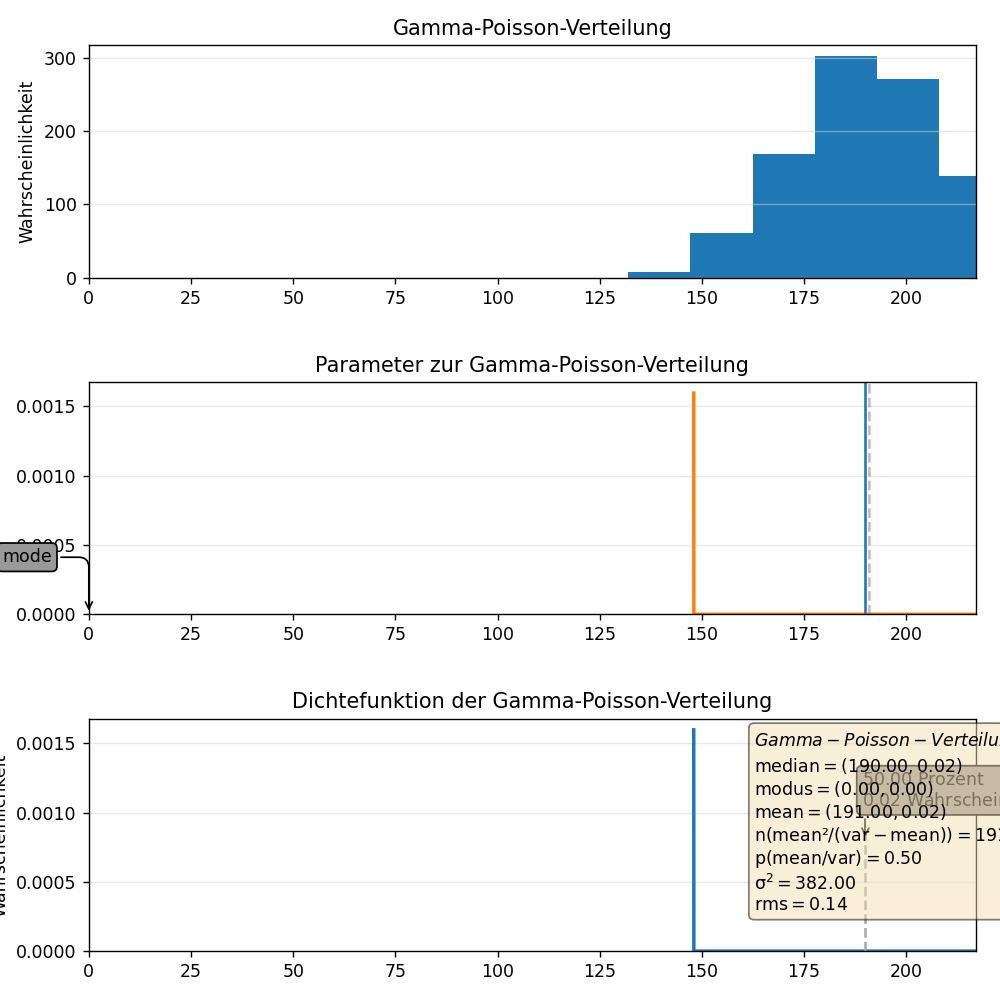

In [10]:
# interaktive Visualisierung:
#
#- Figuren Zeichnen:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,8))

#
# 1. create a callback which updates the plot when a control-value has changed
def update_view(*args):

    # selections
    distribType = distrib_select.value
    #-----------------------------------------------------------
    # Datensatz nach der gewählten Verteilungsfunktion erzeugen
    #   
    # datensatz mit beliebiger größe: rvs({...}) Random variates
    # abszisse: ppf({...}}) Percent point function (inverse of cdf — percentiles).
    # Dichtefunktion/Wahrscheinlichkeitsfunktion: pdf({...}})/pmf({...}})
    # kummulierte Dichtefunktion: cdf({...}}) Cumulative density function.
    # Parameter sind teils in der Klasse der Verteilung enthalten:
    # - Mittelwert, -Median, -Standardabweichung, -Varianz,
    # mode: mode(a[, axis]) Returns an array of the modal (most common) value in the passed array.
    # mode https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mode.html#scipy.stats.mode
    # rms: sqrt(Mittelwert)
    #
    if (distribType == "Normalverteilung"):
        mu.disabled = False
        mu.min = -50
        sigma.disabled = False
        # Diagram-Bereich umschalten damit Funktion sichtbar
#         x_range.max =  mu.value +10
#         x_range.min = mu.value -10
        #
        x_dist = np.arange(norm.ppf(0.001,mu.value, sigma.value),norm.ppf(0.999,mu.value, sigma.value),1/100)
        distrib_f = norm(mu.value, sigma.value)
        mean = distrib_f.mean()
        median = distrib_f.median()
        xQ1 = distrib_f.ppf(quantile.value/100)
        #
        dist_rvs = distrib_f.rvs(size=size.value)
        dist_prob = distrib_f.pdf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
        mean_prob = [mean, distrib_f.pdf(mean)]
        median_prob = [median, distrib_f.pdf(median)]
        mean_cdf = [mean, distrib_f.cdf(mean)]
        median_cdf = [median, distrib_f.cdf(median)]
        mode_cdf = [mode(dist_cdf).mode, distrib_f.cdf(mode(dist_cdf).mode)]
        mode_pdf = [mode(dist_prob).mode, distrib_f.pdf(mode(dist_prob).mode)]
        dist_std = distrib_f.std()
        dist_var = distrib_f.var()
        quantile_prob = [xQ1, distrib_f.pdf(xQ1)]
        quantile_cdf = [xQ1, distrib_f.cdf(xQ1)]
#         Steuerelemente ausblenden
        lambda_wbl.disabled = True
        form_wbl.disabled = True
        n.disabled = True
        p.disabled = True 
        
            
    if (distribType == "Poissonverteilung"):
        mu.disabled = False
        mu.min = 0.1
        # Diagram-Bereich umschalten damit Funktion sichtbar
        x_range.min = 0
#         x_range.max = mu.value +20
        x_dist = np.arange(poisson.ppf(0.001, mu.value), poisson.ppf(0.999,mu.value),1/100)
        distrib_f = 'NaN' # die poisson-funktion entählt kein 'frozen'-object
        mean = poisson.mean(mu.value)
        median = poisson.median(mu.value)
        xQ1 = poisson.ppf(quantile.value/100, mu.value)
        #
        dist_rvs = poisson.rvs(mu.value, size = size.value)
        dist_prob = poisson.pmf(x_dist, mu.value)
        dist_cdf = poisson.cdf(x_dist, mu.value)
        mean_prob = [mean, poisson.pmf(mean, mu.value)]
        median_prob = [median, poisson.pmf(median, mu.value)]
        mean_cdf = [mean, poisson.cdf(mean, mu.value)]
        median_cdf = [median, poisson.cdf(median, mu.value)]
        mode_cdf = [(mode(poisson.cdf(x_dist, mu.value)).mode), poisson.cdf((mode(poisson.cdf(x_dist, mu.value)).mode), mu.value)]
        mode_pdf = [(mode(poisson.pmf(x_dist, mu.value)).mode), poisson.pmf((mode(poisson.cdf(x_dist, mu.value)).mode), mu.value)]
        dist_std = poisson.std(mu.value)
        dist_var = poisson.var(mu.value)
        quantile_prob = [xQ1, poisson.pmf(xQ1, mu.value)]
        quantile_cdf = [xQ1, poisson.cdf(xQ1, mu.value)]
        # steuerelemente ausblenden
        sigma.disabled = True
        lambda_wbl.disabled = True
        form_wbl.disabled = True
        n.disabled = True
        p.disabled = True
                            
    if (distribType == "Gamma-Poisson-Verteilung"):
        n.disabled = False
        p.disabled = False
        # Diagram-Bereich umschalten damit Funktion sichtbar
        x_range.min = 0
        x_range.max = n.max *1.1
        #
        x_dist = np.arange(nbinom.ppf(0.01, n.value, p.value), nbinom.ppf(0.99, n.value, p.value), 1/100)
        distrib_f = nbinom(n.value, p.value)
        mean = distrib_f.mean()
        median = distrib_f.median()
        xQ1 = distrib_f.ppf(quantile.value/100)
        #
        dist_rvs = distrib_f.rvs(size=size.value)
        dist_prob = distrib_f.pmf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
        mean_prob = [mean, distrib_f.pmf(mean)]
        median_prob = [median, distrib_f.pmf(median)]
        mean_cdf = [mean, distrib_f.cdf(mean)]
        median_cdf = [median, distrib_f.cdf(median)]
        mode_cdf = [mode(dist_cdf).mode, distrib_f.cdf(mode(dist_cdf).mode)]
        mode_pdf = [mode(dist_prob).mode, distrib_f.pmf(mode(dist_prob).mode)]
        dist_std = distrib_f.std()
        dist_var = distrib_f.var()
        quantile_prob = [xQ1, distrib_f.pmf(xQ1)]
        quantile_cdf = [xQ1, distrib_f.cdf(xQ1)]
#         print('mean_rfz:%.2f\tmean_pmf:%.2f\tmean_cdf:%.2f' % (mean, mean_prob[-1], mean_cdf[1]))
#         print('median_rfz:%.2f\ttmedian_pmf:%.2f\tmedian_cdf:%.2f' % (median, median_prob[-1], median_cdf[1]))
#         print('std_rfz:%.2f\tstd_pmf:%.2f\tstd_cdf:%.2f' % (dist_std, dist_prob.std(), dist_cdf.std()))
        # steuerelemente ausblenden
        lambda_wbl.disabled = True
        form_wbl.disabled = True
        mu.disabled = True
        sigma.disabled = True

        
    if (distribType == "Weibull-Verteilung"):
        lambda_wbl.disabled = False
        form_wbl.disabled = False
        # Diagram-Bereich umschalten damit Funktion sichtbar
        x_range.min = 0
#         x_range.max = 10
        x_dist = np.arange(weibull_min.ppf(0.01, form_wbl.value, scale= lambda_wbl.value), weibull_min.ppf(0.99, form_wbl.value,scale= lambda_wbl.value),1/100)
        distrib_f = weibull_min(form_wbl.value, scale=lambda_wbl.value)
        mean = distrib_f.mean()
        median = distrib_f.median()
        xQ1 = distrib_f.ppf(quantile.value/100)
        #
        dist_rvs = distrib_f.rvs(size=size.value)
        dist_prob = distrib_f.pdf(x_dist)
        dist_cdf = distrib_f.cdf(x_dist)
        mean_prob = [mean, distrib_f.pdf(mean)]
        median_prob = [median, distrib_f.pdf(median)]
        mean_cdf = [mean, distrib_f.cdf(mean)]
        median_cdf = [median, distrib_f.cdf(median)]
#         mode_cdf = [mode(dist_cdf).mode, distrib_f.cdf(mode(dist_cdf).mode)]
        if form_wbl.value > 1:
            mode_x = lambda_wbl.value*((form_wbl.value-1)/form_wbl.value)**(1/form_wbl.value)
            mode_cdf = [mode_x, distrib_f.cdf(mode_x)]
            mode_pdf = [mode_x, distrib_f.pdf(mode_x)]
        else:
            mode_cdf = [0,0]
            mode_pdf = mode_cdf
#         mode_pdf = [mode(dist_prob).mode, distrib_f.pdf(mode(dist_prob).mode)]
        dist_std = distrib_f.std()
        dist_var = distrib_f.var()
        quantile_prob = [xQ1, distrib_f.pdf(xQ1)]
        quantile_cdf = [xQ1, distrib_f.cdf(xQ1)]
# 
# nicht benötigte Steuerelemente ausblenden
        mu.disabled = True
        sigma.disabled = True
        n.disabled = True
        p.disabled = True
        #

# diagramme aktualisieren
#
    distributionSelected = {\
                            'x': x_dist,\
                            'distrib_f': distrib_f,\
                            'rvs': dist_rvs,\
                            'prob_f': dist_prob,\
                            'cdf': dist_cdf,\
                            'mean_prob': mean_prob,\
                            'median_prob': median_prob,\
                            'mean_cdf': mean_cdf,\
                            'median_cdf': median_cdf,\
                            'mode_cdf': mode_cdf,\
                            'mode_prob':mode_pdf,\
                            'std': dist_std,\
                            'var': dist_var,\
                            'rms': np.sqrt(mean_prob[-1]),\
                            'quantile_prob': quantile_prob,\
                            'quantile_cdf': quantile_cdf\
                            }
    #
    draw_rvs(distributionSelected, axes[0])
    draw_params(distributionSelected, axes[1])
    draw_custom(distributionSelected, axes[2])
    
    fig.tight_layout()
    
    
#--------------------------------------------------------
# 2. die Callback-Funktion mit der Funktion 'observe' den Steuerelementen zuweisen
    
distrib_select.observe(update_view, 'value')
size.observe(update_view, 'value')
mu.observe(update_view, 'value')
sigma.observe(update_view, 'value')
lambda_wbl.observe(update_view, 'value')
form_wbl.observe(update_view, 'value')
n.observe(update_view, 'value')
p.observe(update_view, 'value')
quantile.observe(update_view, 'value')
toggle_1.observe(update_view, 'value')
toggle_2.observe(update_view, 'value')
x_range.observe(update_view, 'value')
BtnReset.on_click(reset_controls)

#--------------------------------------------------------
# Anwendung starten
#
# Diagramme einmal zeichnen
update_view()
#
# mit 'widgets.VBox / .HBox' die Steuerelemente arangieren
box_layout = widgets.Layout(display='inline-flex',flex_flow='row',align_items='flex-start',width='90%')

widgets.VBox([widgets.HBox([widgets.VBox([distrib_select,size]),\
             widgets.VBox([mu,sigma,lambda_wbl,form_wbl,n,p]),\
             widgets.VBox([toggle_1,toggle_2])],\
                           layout= box_layout),
              quantile, x_range,BtnReset])